<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/Loan_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [506]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

#Datasets

In [507]:
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [508]:
df.shape

(614, 13)

#Data preprocessing

In [509]:
df = df.dropna()

In [510]:
df.replace({'Gender' : {'Male':1, 'Female':0}, 'Married': {'Yes':1, 'No':0}, 'Education' : {'Graduate':1, 'Not Graduate':0},
            'Self_Employed' : {'Yes':1, 'No':0}, 'Property_Area' : {'Rural':0, 'Semiurban':1, 'Urban':2}, 'Loan_Status' : {'Y':1, 'N':0}}, inplace=True)

<ipython-input-510-2fc38d5c7014>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Gender' : {'Male':1, 'Female':0}, 'Married': {'Yes':1, 'No':0}, 'Education' : {'Graduate':1, 'Not Graduate':0},


In [511]:
df.drop(columns='Loan_ID',axis=1, inplace=True)

In [512]:
df['Dependents'].replace('3+', 4, inplace=True)

In [513]:
df['Dependents'] = df['Dependents'].astype(int)

In [514]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [515]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

#Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

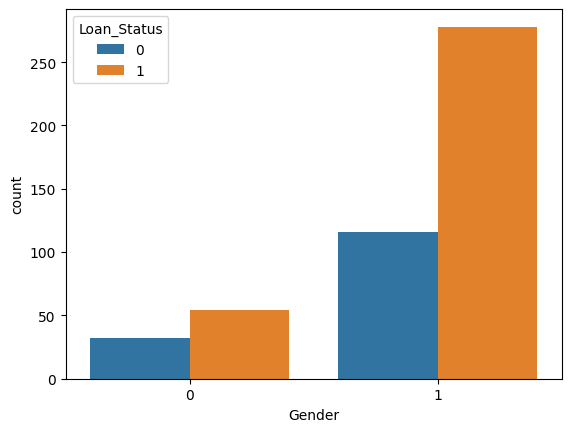

In [516]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)

<Axes: xlabel='Married', ylabel='count'>

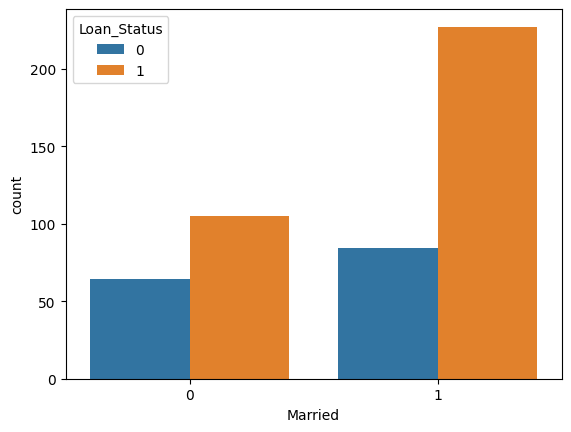

In [517]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

<Axes: xlabel='Education', ylabel='count'>

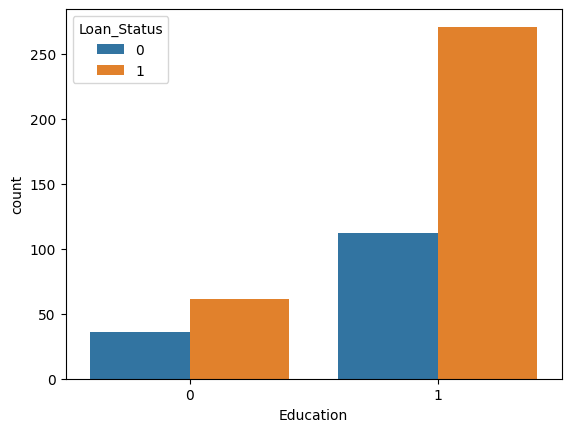

In [518]:
sns.countplot(x='Education', hue='Loan_Status', data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

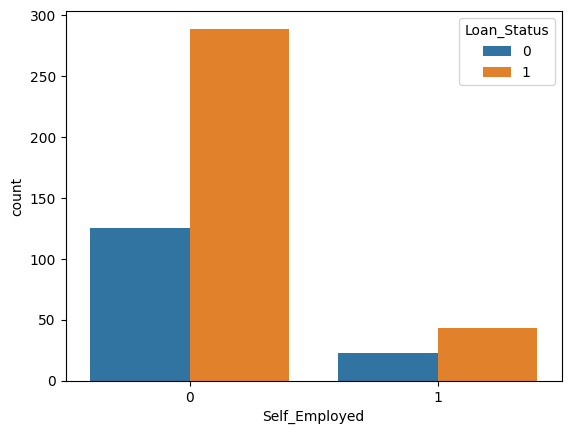

In [519]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

#Train/Testing Datasets

In [520]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [521]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
new_df = pd.DataFrame(data, columns=df.columns)

In [522]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
new_df = pd.DataFrame(data, columns=df.columns)

In [523]:
len(new_df[new_df['Loan_Status']==1]), len(new_df[new_df['Loan_Status']==0])

(332, 332)

In [524]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2)
x_test, x_valid, y_test, y_valid = train_test_split(x_temp, y_temp, test_size=0.5)

#SVM

In [525]:
from sklearn.svm import SVC

In [526]:
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [527]:
y_pred = svm_model.predict(x_test)

In [528]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.81      0.83      0.82        36

    accuracy                           0.80        66
   macro avg       0.80      0.80      0.80        66
weighted avg       0.80      0.80      0.80        66



#Naive Bayes

In [529]:
from sklearn.naive_bayes import GaussianNB

In [530]:
n_model = GaussianNB()
n_model.fit(x_train, y_train)

GaussianNB()

In [531]:
y_pred = n_model.predict(x_test)

In [532]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        30
           1       0.77      0.94      0.85        36

    accuracy                           0.82        66
   macro avg       0.84      0.81      0.81        66
weighted avg       0.83      0.82      0.81        66



#KNN

In [533]:
from sklearn.neighbors import KNeighborsClassifier

In [534]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [535]:
y_pred = knn_model.predict(x_test)

In [536]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        30
           1       0.84      0.75      0.79        36

    accuracy                           0.79        66
   macro avg       0.79      0.79      0.79        66
weighted avg       0.79      0.79      0.79        66



#Logistic

In [537]:
from sklearn.linear_model import LogisticRegression

In [538]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

LogisticRegression()

In [539]:
y_pred = lg_model.predict(x_test)

In [540]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.79      0.92      0.85        36

    accuracy                           0.82        66
   macro avg       0.83      0.81      0.81        66
weighted avg       0.83      0.82      0.82        66



#Neural Network

In [541]:
import tensorflow as tf

In [542]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

In [543]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
  history = nn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid), verbose=0)
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 16


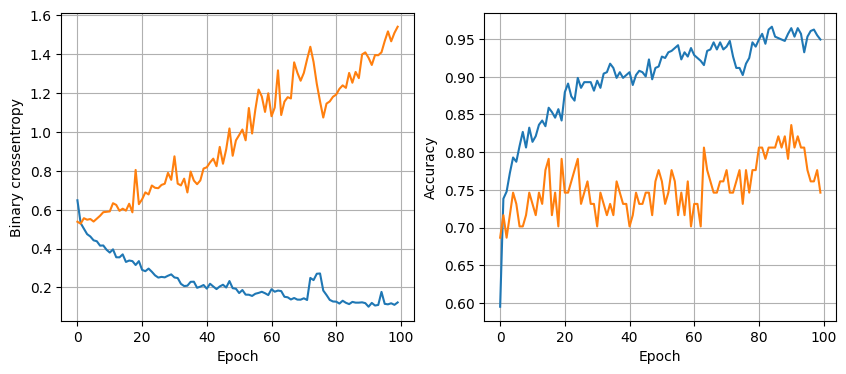

3/3 [==============================] - 0s 5ms/step - loss: 1.5401 - accuracy: 0.7463
16 nodes, dropout 0, lr 0.01, batch_size 32


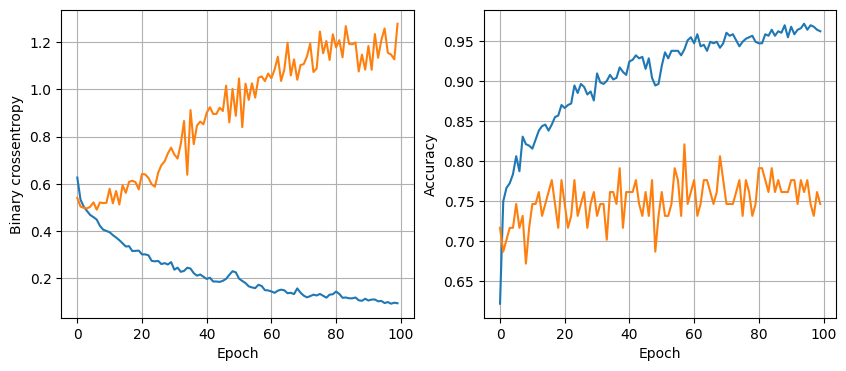

3/3 [==============================] - 0s 4ms/step - loss: 1.2782 - accuracy: 0.7463
16 nodes, dropout 0, lr 0.001, batch_size 16


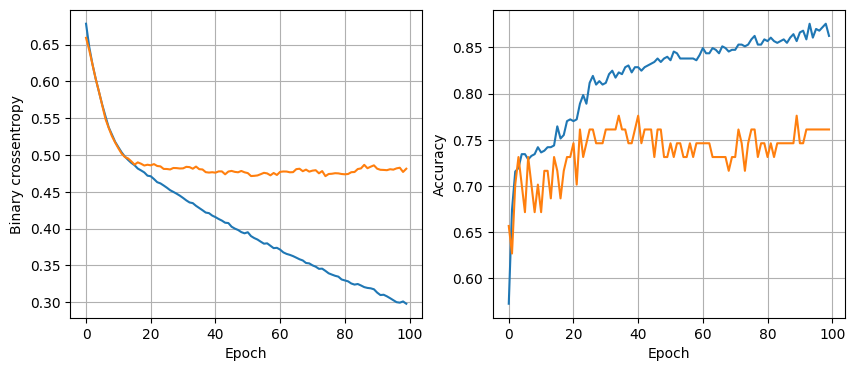

3/3 [==============================] - 0s 7ms/step - loss: 0.4814 - accuracy: 0.7612
16 nodes, dropout 0, lr 0.001, batch_size 32


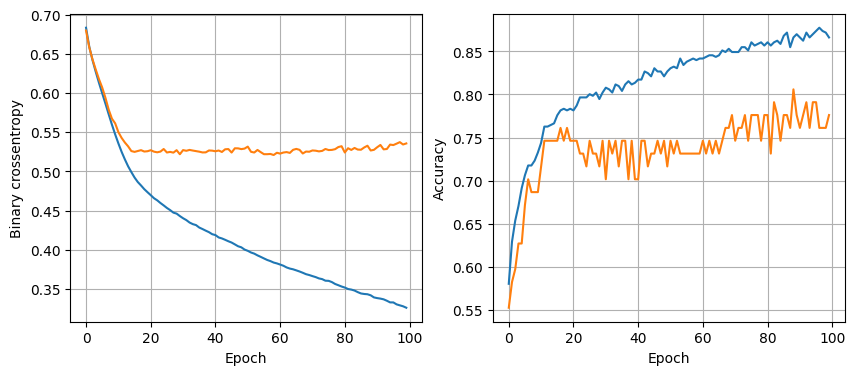

3/3 [==============================] - 0s 5ms/step - loss: 0.5358 - accuracy: 0.7761
16 nodes, dropout 0.2, lr 0.01, batch_size 16


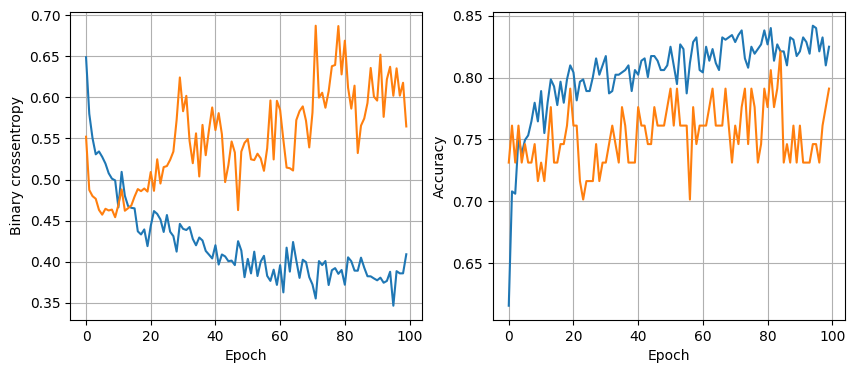

3/3 [==============================] - 0s 7ms/step - loss: 0.5646 - accuracy: 0.7910
16 nodes, dropout 0.2, lr 0.01, batch_size 32


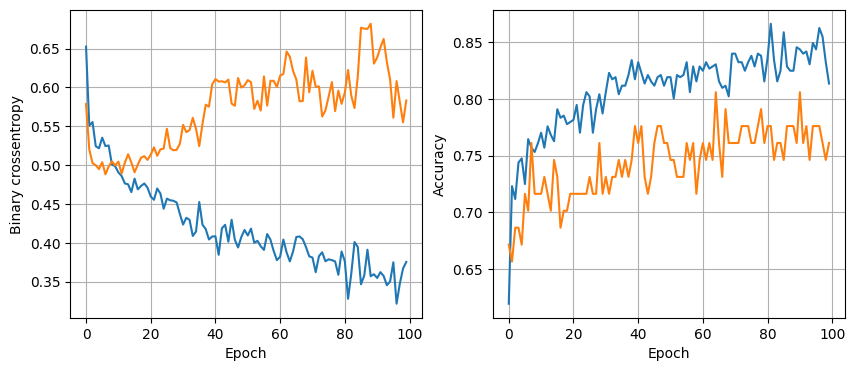

3/3 [==============================] - 0s 6ms/step - loss: 0.5832 - accuracy: 0.7612
16 nodes, dropout 0.2, lr 0.001, batch_size 16


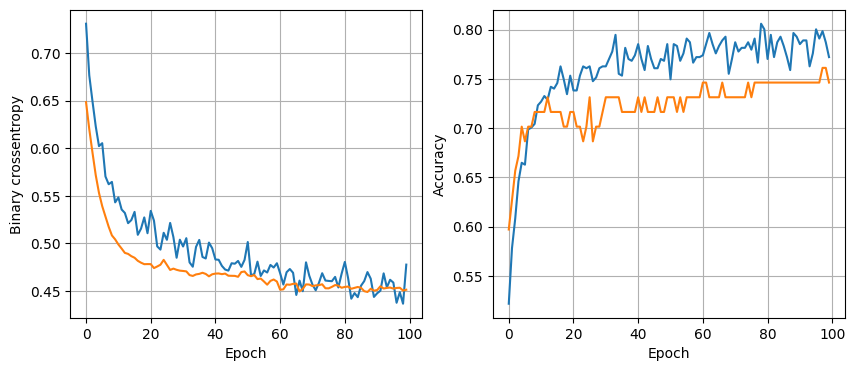

3/3 [==============================] - 0s 6ms/step - loss: 0.4513 - accuracy: 0.7463
16 nodes, dropout 0.2, lr 0.001, batch_size 32


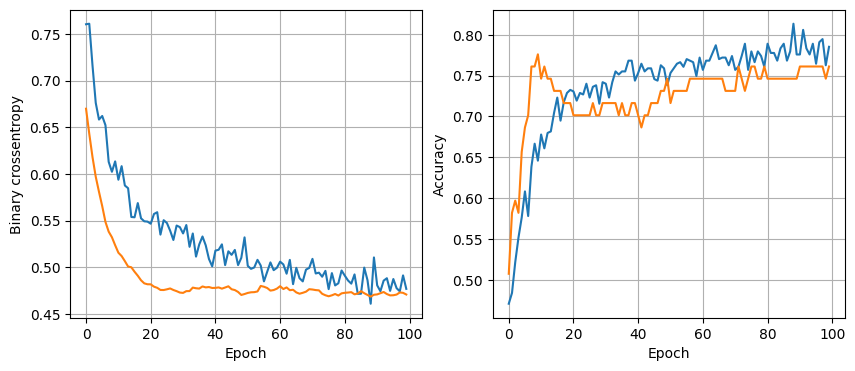

3/3 [==============================] - 0s 6ms/step - loss: 0.4708 - accuracy: 0.7612
32 nodes, dropout 0, lr 0.01, batch_size 16


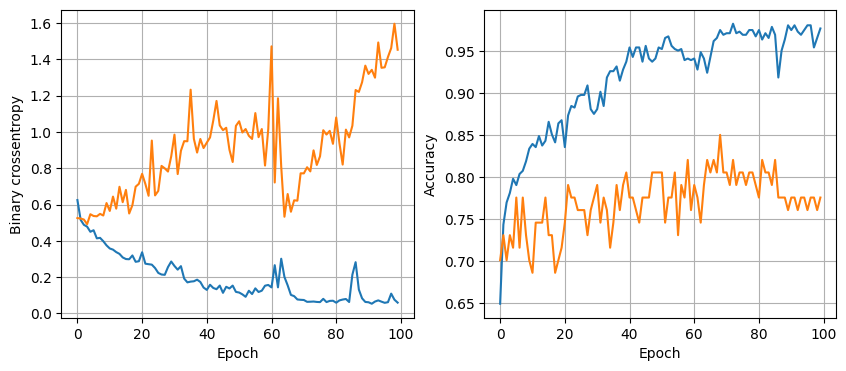

3/3 [==============================] - 0s 6ms/step - loss: 1.4526 - accuracy: 0.7761
32 nodes, dropout 0, lr 0.01, batch_size 32


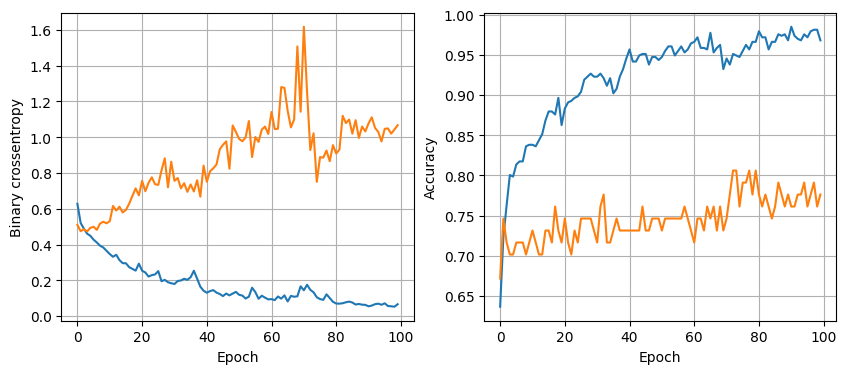

3/3 [==============================] - 0s 7ms/step - loss: 1.0667 - accuracy: 0.7761
32 nodes, dropout 0, lr 0.001, batch_size 16


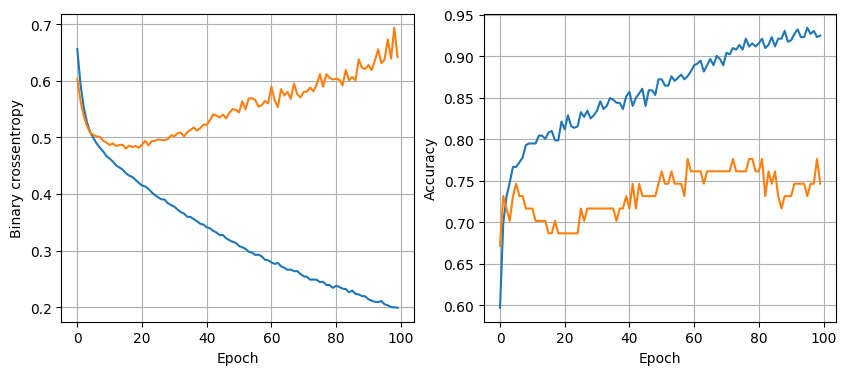

3/3 [==============================] - 0s 8ms/step - loss: 0.6420 - accuracy: 0.7463
32 nodes, dropout 0, lr 0.001, batch_size 32


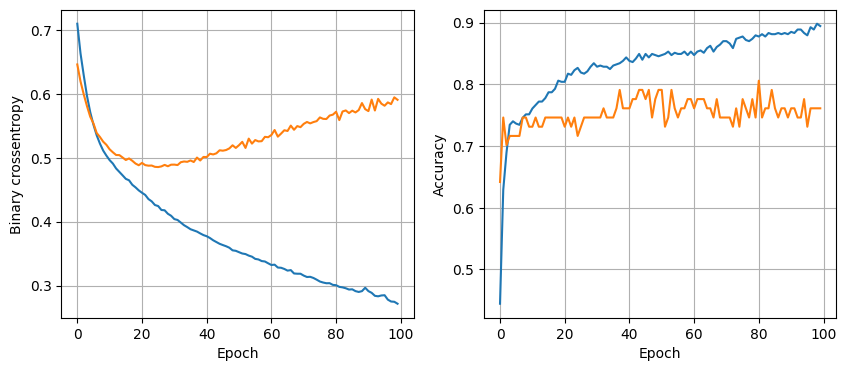

3/3 [==============================] - 0s 8ms/step - loss: 0.5907 - accuracy: 0.7612
32 nodes, dropout 0.2, lr 0.01, batch_size 16


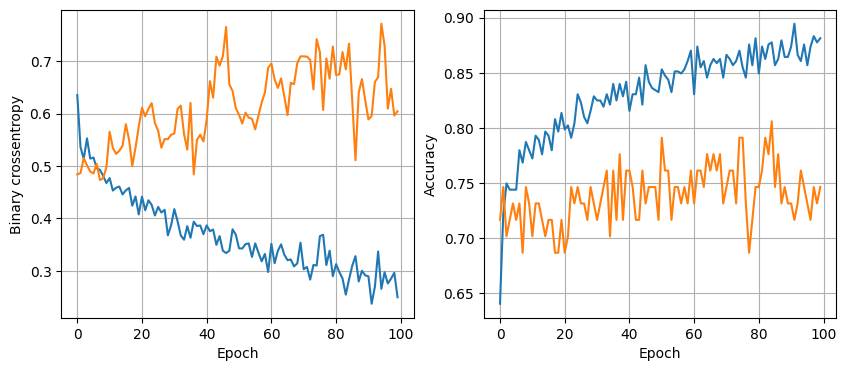

3/3 [==============================] - 0s 9ms/step - loss: 0.6043 - accuracy: 0.7463
32 nodes, dropout 0.2, lr 0.01, batch_size 32


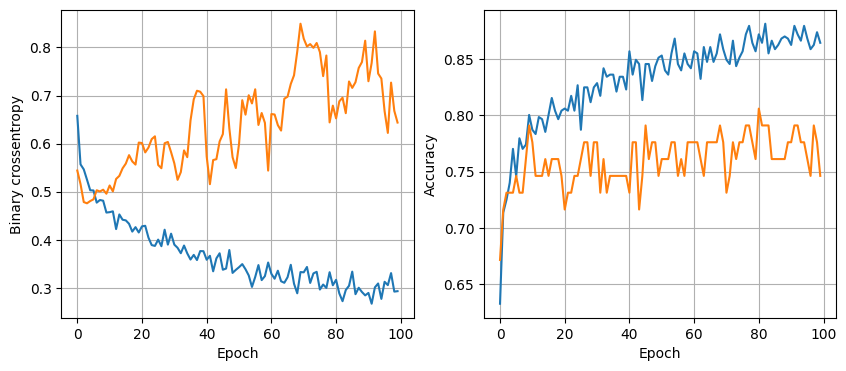

3/3 [==============================] - 0s 10ms/step - loss: 0.6438 - accuracy: 0.7463
32 nodes, dropout 0.2, lr 0.001, batch_size 16


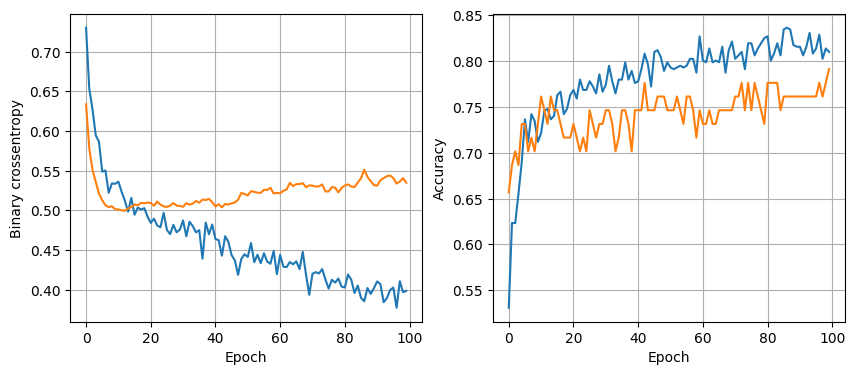

3/3 [==============================] - 0s 10ms/step - loss: 0.5348 - accuracy: 0.7910
32 nodes, dropout 0.2, lr 0.001, batch_size 32


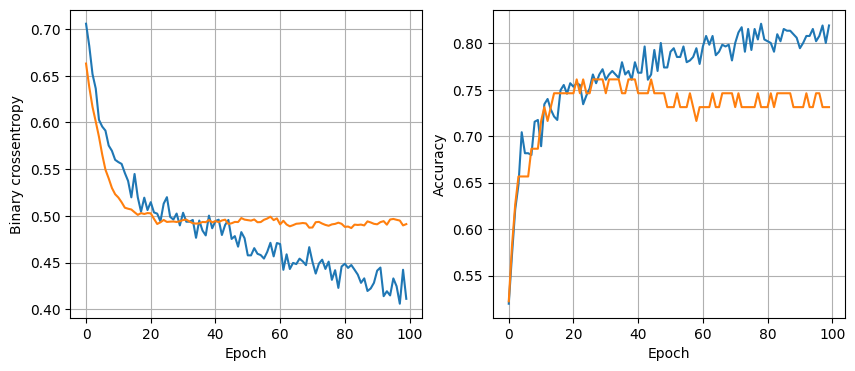

3/3 [==============================] - 0s 8ms/step - loss: 0.4912 - accuracy: 0.7313
64 nodes, dropout 0, lr 0.01, batch_size 16


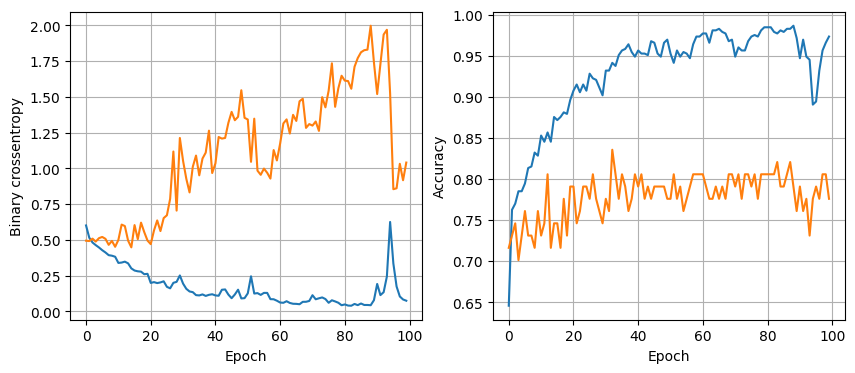

3/3 [==============================] - 0s 6ms/step - loss: 1.0412 - accuracy: 0.7761
64 nodes, dropout 0, lr 0.01, batch_size 32


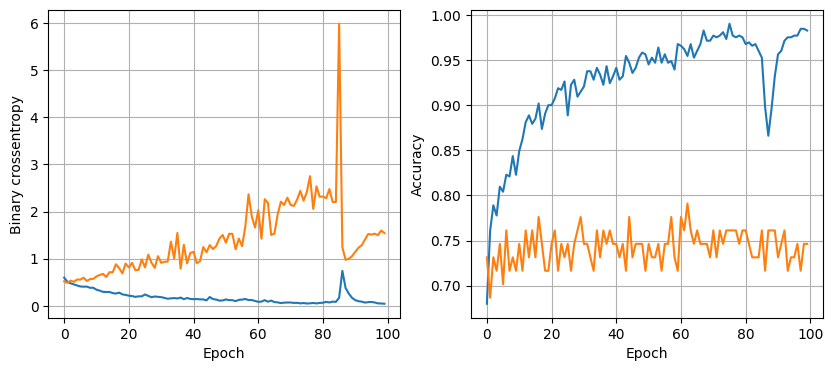

3/3 [==============================] - 0s 5ms/step - loss: 1.5422 - accuracy: 0.7463
64 nodes, dropout 0, lr 0.001, batch_size 16


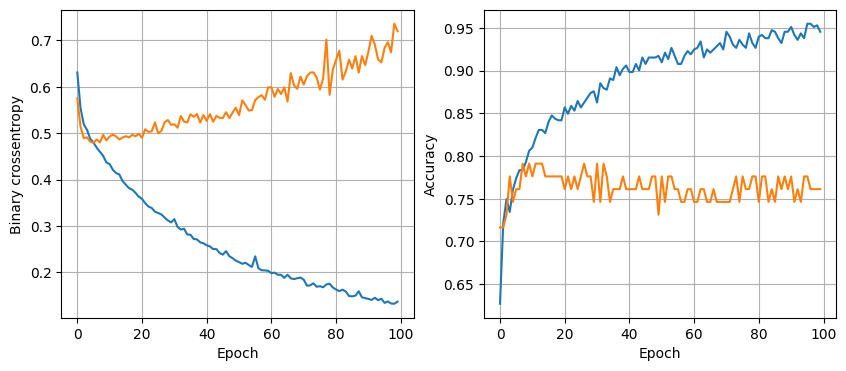

3/3 [==============================] - 0s 10ms/step - loss: 0.7198 - accuracy: 0.7612
64 nodes, dropout 0, lr 0.001, batch_size 32


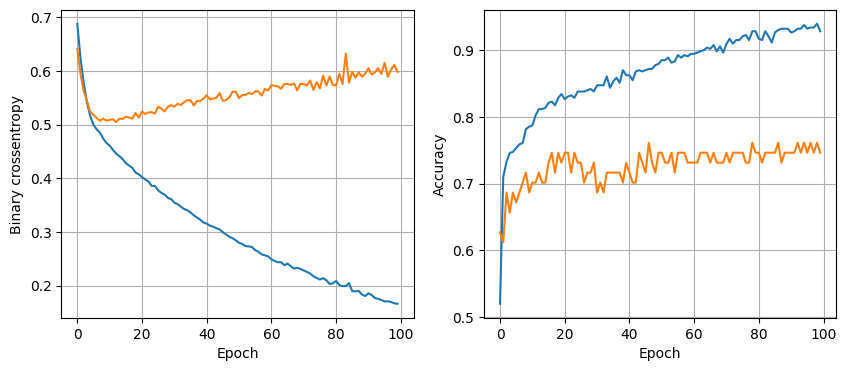

3/3 [==============================] - 0s 4ms/step - loss: 0.5981 - accuracy: 0.7463
64 nodes, dropout 0.2, lr 0.01, batch_size 16


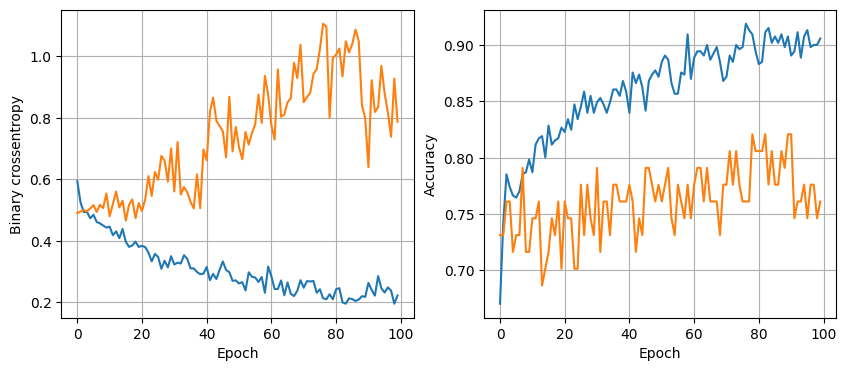

3/3 [==============================] - 0s 7ms/step - loss: 0.7875 - accuracy: 0.7612
64 nodes, dropout 0.2, lr 0.01, batch_size 32


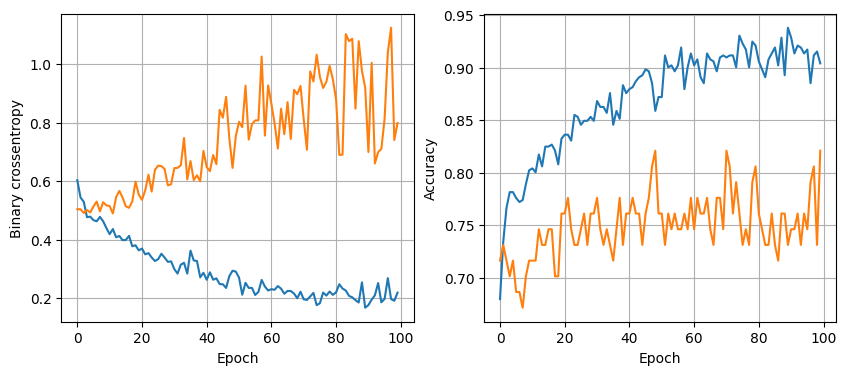

3/3 [==============================] - 0s 5ms/step - loss: 0.7986 - accuracy: 0.8209
64 nodes, dropout 0.2, lr 0.001, batch_size 16


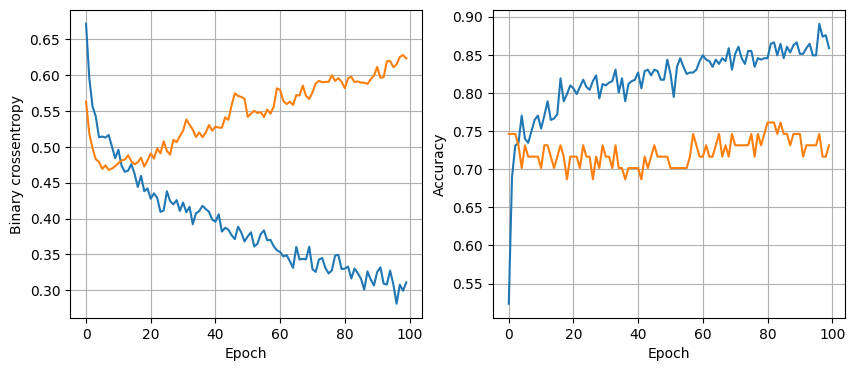

3/3 [==============================] - 0s 6ms/step - loss: 0.6233 - accuracy: 0.7313
64 nodes, dropout 0.2, lr 0.001, batch_size 32


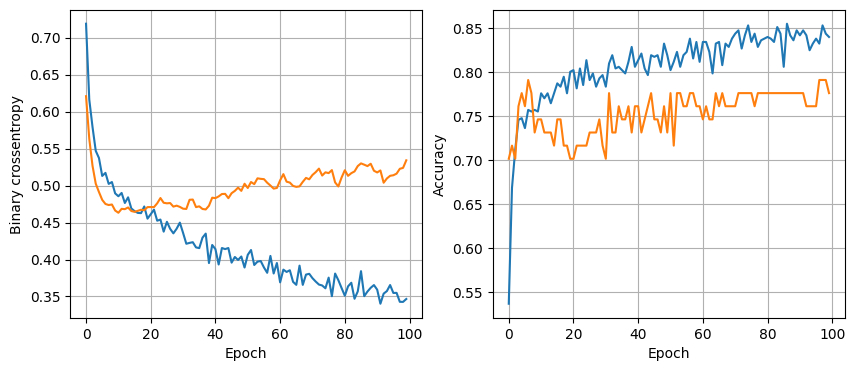

3/3 [==============================] - 0s 7ms/step - loss: 0.5341 - accuracy: 0.7761


In [544]:
max_accuracy = 0
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.001]:
      for batch_size in [16, 32]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_accuracy = model.evaluate(x_valid, y_valid)[1]
        if val_accuracy > max_accuracy:
          max_accuracy = val_accuracy
          least_loss_model = model

In [545]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

3/3 [==============================] - 0s 4ms/step


In [546]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        30
           1       0.90      0.75      0.82        36

    accuracy                           0.82        66
   macro avg       0.82      0.82      0.82        66
weighted avg       0.83      0.82      0.82        66

